### **Task 18**

Perform statistical analysis using this dataset.

- https://www.kaggle.com/datasets/abrambeyer/openintro-possum

- Document in detail, the interpretation of your results from all the measures of centre, all measures of spread,  and outlier detection mechanisms.

- Do not do anything on Probability distribution.

- Be intuitive about the statistical insight and information you can get from your data.

## Statistical Analysis for Possums

In [781]:
#Load libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Preliminary Data Analysis

In [782]:
# loading the dataset
df = pd.read_csv("possum.csv")

# displaying thw first 5 columns of the dataset
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [783]:
# checking the data types
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [784]:
# checking the statistica; summary
df.describe(include="all")

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


### Data Cleaning

In [785]:
# checking the data for missing and null values
df.isna().sum()
df.isnull().sum()


case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [786]:
# dropping the columns with missing valus
possums = df.dropna()
possums
# df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [787]:
# df.nunique()
# checking for duplicate values
possums.duplicated().sum()


np.int64(0)

In [788]:
# checking the locations were the possums were trapped
trapped_location =possums["site"].value_counts()
trapped_location

site
1    33
7    18
5    13
6    13
2    10
3     7
4     7
Name: count, dtype: int64

In [789]:
# checking the population of the possums in each locations
possum_population = possums["Pop"].value_counts()
possum_population

Pop
other    58
Vic      43
Name: count, dtype: int64

## Measures of Centre

In [790]:
# filtering the possums by sex
female = possums[possums["sex"] == "f"]
female.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0


In [791]:

# getting the total number of female possums 
no_of_females= female.value_counts().sum()

# calculating the mean of the ages of the female possum
female_possum  = female["age"]
female_possum_mean = np.mean(female_possum)
print(f"The total number of female possum is:  {no_of_females}")
print(f"The medianage of all the female possums is:{female_possum_mean}")

The total number of female possum is:  42
The medianage of all the female possums is:3.9523809523809526


In [792]:
# calculating the median of the ages of the female possum
female_possum_median = np.median(female_possum)
print('The median of all female possums is: ', female_possum_median)

The median of all female possums is:  3.5


In [793]:
# calculating the mode of all the female possum, filtering by age
female_possum_mode = female_possum.mode().sum()
print('The most frequent age of the female possums is: ', female_possum_mode)


The most frequent age of the female possums is:  3.0


In [794]:
# filtering the data by sex
male = possums[possums["sex"] == "m"]
male.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
12,13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
13,14,1,Vic,m,3.0,95.4,57.6,91.5,36.0,74.3,53.7,15.1,28.0,31.5
14,15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0


In [795]:
# calculating the mean of all the male possum filtering by age

# getting the total number of female possums 
no_of_males= male.value_counts().sum()

# calculating the mean of the ages of the female possum
male_possum  = male["age"]
male_possum_mean = np.mean(male_possum)

print(f"The total number of male possum is: {no_of_males}")
print(f"The average age of all the male possums is: {male_possum_mean}")


The total number of male possum is: 59
The average age of all the male possums is: 3.7288135593220337


In [796]:
# calculating the median of the ages of the male possum
male_possum_median  = male["age"]
print('The median of all male possums is: ',np.median(male_possum_median))

The median of all male possums is:  3.0


In [797]:
# calculating the mode of all the male possum, filtering by age
male_possum_mode = male_possum.mode()
print('The most frequent age of the male possums is: ', male_possum_mode)


The most frequent age of the male possums is:  0    3.0
Name: age, dtype: float64


### `Data Visualization for the sexes by age of the possums`

In [798]:
# grouping male possums by sex and age
total_male = male.groupby("sex")["age"].value_counts(ascending= True)
total_male

sex  age
m    8.0     1
     6.0     5
     7.0     6
     1.0     7
     5.0     7
     4.0     8
     2.0     9
     3.0    16
Name: count, dtype: int64

<Axes: title={'center': 'Male Possums by Age'}, xlabel='sex,age', ylabel='frequency'>

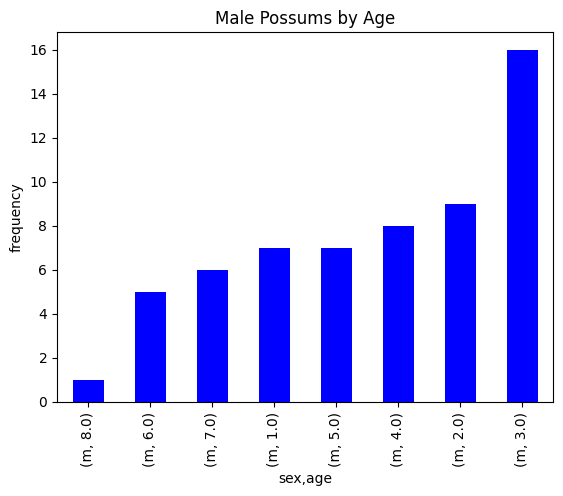

In [799]:
# plotting the mchart for total male
total_male.plot(kind='bar', ylabel="frequency", title="Male Possums by Age", color= "blue")

In [800]:
# grouping male possums by sex and age
total_female = female.groupby("sex")["age"].value_counts(ascending= True)
total_female

sex  age
f    7.0     1
     9.0     2
     1.0     3
     5.0     5
     4.0     6
     2.0     7
     6.0     7
     3.0    11
Name: count, dtype: int64

<Axes: title={'center': 'Female Possums by Age'}, xlabel='sex,age', ylabel='frequency'>

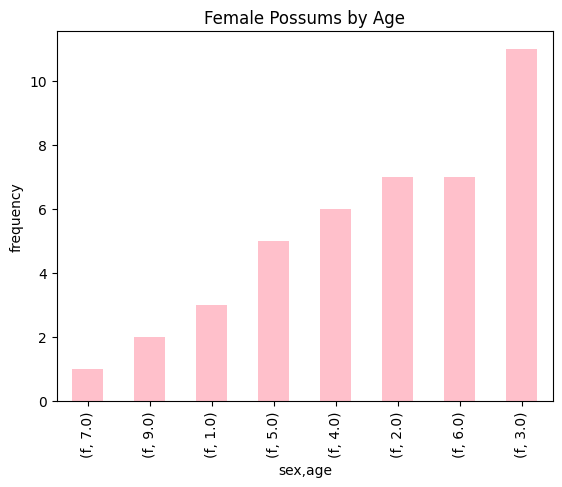

In [801]:
# plotting the chart of the female possums
total_female.plot(kind='bar', ylabel="frequency", title="Female Possums by Age", color= "pink")

 **Interpretation of Findings Using the Sex VS Age of the Possums**
 - There are 11 female possums and 16 male possums aged 3 which infers that the most of the possums are aged 3.
 - The possums with empty age data was dropped.
 - The oldest male possums are aged 8 and the oldest female possum are aged 9
 




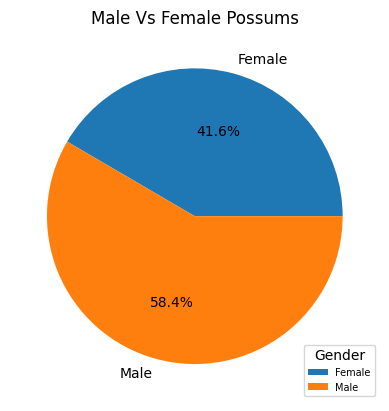

In [802]:
# plotting the chart of total number of fmale possums against female possums
total_sex = possums.groupby("sex")["sex"].value_counts(ascending= True)
labels = ["Female", "Male"]
plt.pie(total_sex, labels = labels, autopct= "%1.1f%%")
plt.legend(title="Gender", loc = "lower right", fontsize = 7)
plt.title("Male Vs Female Possums")
plt.show()

**Insights Using Gender**
- There are `42` Female Possums which makes `41.6%` of the total population of possums 
- There are `59` Male Possums which makes `58.4%` of the total population of possums

### `Data Visualization of the Possums by their Trapped site  and gender` 

In [803]:
# grouping the male possums by their trapped site location
total_trapped_male = male.groupby("sex")["site"].value_counts(ascending=True)
total_trapped_male

sex  site
m    3        4
     4        5
     2        6
     5        7
     6        9
     1       14
     7       14
Name: count, dtype: int64

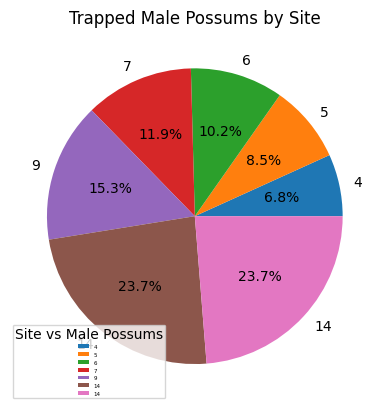

In [804]:
# data visualization of the male possums by their trapped site location
labels = total_trapped_male
plt.pie(total_trapped_male, labels = labels, autopct= "%1.1f%%")
plt.legend(title="Site vs Male Possums", loc = "lower left", fontsize = 4)
plt.title("Trapped Male Possums by Site")
plt.show()

In [805]:
# grouping the female possums by their trapped site location
total_trapped_female = female.groupby("sex")["site"].value_counts(ascending=True)
total_trapped_female

sex  site
f    4        2
     3        3
     2        4
     6        4
     7        4
     5        6
     1       19
Name: count, dtype: int64

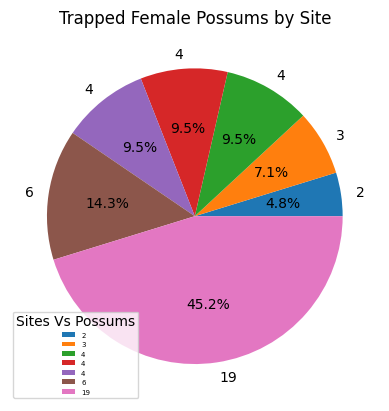

In [806]:
# data visualization of the female possums by their trapped site location
labels = total_trapped_female
plt.pie(total_trapped_female, labels = labels, autopct= "%1.1f%%")
plt.legend(title="Sites Vs Possums", loc = "lower left", fontsize = 5)
plt.title("Trapped Female Possums by Site")
plt.show()

**Insights Using Gender Vs Trapped Locations**
- 45.2% of the female possums were trapped from site 1
- 23.7% of the male possums were trapped from site 1 
- 23.7% of the male possums were trapped from site 7

**Calculating the measures of Center using the features of the possum by columns**

In [807]:
# calculating the mean of each features of a female possum
female_features_mean = female.mean(axis=0, numeric_only= True) 

print(f" The average headlength of the female possums is: {female_features_mean["hdlngth"]}")
print(f" The average Skull width of the female possums is: {female_features_mean["skullw"]}")
print(f" The average total length of the female possums is: {female_features_mean["totlngth"]}")
print(f" The average tail length of the female possums is: {female_features_mean["taill"]}")
print(f" The average foot length of the female possums is: {female_features_mean["footlgth"]}")
print(f" The average foot length of the female possums is: {female_features_mean["eye"]}")
print(f" The average length of the female possums chest is: {female_features_mean["chest"]}")
print(f" The average length of the female possums belly is: {female_features_mean["belly"]}")
print(f" TThe y length of the female possums earconch is: {female_features_mean["earconch"]}")



 The average headlength of the female possums is: 92.23809523809524
 The average Skull width of the female possums is: 56.57857142857142
 The average total length of the female possums is: 88.02380952380952
 The average tail length of the female possums is: 37.11904761904762
 The average foot length of the female possums is: 69.11190476190475
 The average foot length of the female possums is: 14.785714285714286
 The average length of the female possums chest is: 27.345238095238095
 The average length of the female possums belly is: 32.94047619047619
 TThe y length of the female possums earconch is: 48.773809523809526


In [808]:
# calculating the mean of each features of a male possum
male_features_mean = male.mean(axis=0, numeric_only= True) 

print(f" The average headlength of the male possums is: {male_features_mean["hdlngth"]}")
print(f" The average Skull width of the male possums is: {male_features_mean["skullw"]}")
print(f" The average total length of the male possums is: {male_features_mean["totlngth"]}")
print(f" The average tail length of the male possums is: {male_features_mean["taill"]}")
print(f" The average foot length of the male possums is: {male_features_mean["footlgth"]}")
print(f" The average foot length of the male possums is: {male_features_mean["eye"]}")
print(f" The average length of the male possums chest is: {male_features_mean["chest"]}")
print(f" The average length of the male possums belly is: {male_features_mean["belly"]}")
print(f" TThe y length of the male possums earconch is: {male_features_mean["earconch"]}")



 The average headlength of the male possums is: 93.0813559322034
 The average Skull width of the male possums is: 57.2322033898305
 The average total length of the male possums is: 86.7322033898305
 The average tail length of the male possums is: 37.0
 The average foot length of the male possums is: 67.88983050847457
 The average foot length of the male possums is: 15.238983050847455
 The average length of the male possums chest is: 26.864406779661017
 The average length of the male possums belly is: 32.42372881355932
 TThe y length of the male possums earconch is: 47.67796610169491


In [809]:
# calculating the mode of each features of a male possum
male_features_mode = male.mode().iloc[0] 
# print(f"This is the mode of each female features\n{female_features_mode}")

print(f" The headlength mode of the male possums is: {male_features_mode["hdlngth"]}")
print(f" The Skull width mode of the male possums is: {male_features_mode["skullw"]}")
print(f" The total length mode of the male possums is: {male_features_mode["totlngth"]}")
print(f" The tail length mode of the male possums is: {male_features_mode["taill"]}")
print(f" The foot length mode of the male possums is: {male_features_mode["footlgth"]}")
print(f" The foot length mode of the male possums is: {male_features_mode["eye"]}")
print(f" The modal length of the male possums chest is: {male_features_mode["chest"]}")
print(f" The modal length of the male possums belly is: {male_features_mode["belly"]}")
print(f" TThe modal length of the male possums earconch is: {male_features_mode["earconch"]}")



 The headlength mode of the male possums is: 89.5
 The Skull width mode of the male possums is: 56.0
 The total length mode of the male possums is: 85.0
 The tail length mode of the male possums is: 38.0
 The foot length mode of the male possums is: 65.6
 The foot length mode of the male possums is: 15.0
 The modal length of the male possums chest is: 27.0
 The modal length of the male possums belly is: 32.0
 TThe modal length of the male possums earconch is: 44.9


In [810]:
# calculating the mode of each features of a female possum
female_features_mode = female.mode().iloc[0] 
# print(f"This is the mode of each female features\n{female_features_mode}")

print(f" The headlength mode of the female possums is: {female_features_mode["hdlngth"]}")
print(f" The Skull width mode of the female possums is: {female_features_mode["skullw"]}")
print(f" The total length mode of the female possums is: {female_features_mode["totlngth"]}")
print(f" The tail length mode of the female possums is: {female_features_mode["taill"]}")
print(f" The foot length mode of the female possums is: {female_features_mode["footlgth"]}")
print(f" The foot length mode of the female possums is: {female_features_mode["eye"]}")
print(f" The modal length of the female possums chest is: {female_features_mode["chest"]}")
print(f" The modal length of the female possums belly is: {female_features_mode["belly"]}")
print(f" TThe modal length of the female possums earconch is: {female_features_mode["earconch"]}")



 The headlength mode of the female possums is: 90.0
 The Skull width mode of the female possums is: 56.3
 The total length mode of the female possums is: 89.0
 The tail length mode of the female possums is: 38.0
 The foot length mode of the female possums is: 72.8
 The foot length mode of the female possums is: 14.0
 The modal length of the female possums chest is: 28.0
 The modal length of the female possums belly is: 34.0
 TThe modal length of the female possums earconch is: 46.0


In [811]:
# calculating the mode of each features of a female possum
female_features_median = female.median(numeric_only= True)
# print(f"This is the mode of each female features\n{female_features_mode}")

print(f" The headlength median of the female possums is: {female_features_median["hdlngth"]}")
print(f" The Skull width median of the female possums is: {female_features_median["skullw"]}")
print(f" The total length median of the female possums is: {female_features_median["totlngth"]}")
print(f" The tail length median of the female possums is: {female_features_median["taill"]}")
print(f" The foot length median of the female possums is: {female_features_median["footlgth"]}")
print(f" The foot length median of the female possums is: {female_features_median["eye"]}")
print(f" The median length of the female possums chest is: {female_features_median["chest"]}")
print(f" The median length of the female possums belly is: {female_features_median["belly"]}")
print(f" TThe median length of the female possums earconch is: {female_features_median["earconch"]}")



 The headlength median of the female possums is: 92.5
 The Skull width median of the female possums is: 56.349999999999994
 The total length median of the female possums is: 88.75
 The tail length median of the female possums is: 37.75
 The foot length median of the female possums is: 70.44999999999999
 The foot length median of the female possums is: 14.75
 The median length of the female possums chest is: 28.0
 The median length of the female possums belly is: 33.0
 TThe median length of the female possums earconch is: 50.8


In [812]:
# calculating the mode of each features of a male possum
male_features_median = male.median(numeric_only= True)

print(f" The headlength median of the male possums is: {male_features_median["hdlngth"]}")
print(f" The Skull width median of the male possums is: {male_features_median["skullw"]}")
print(f" The total length median of the male possums is: {male_features_median["totlngth"]}")
print(f" The tail length median of the male possums is: {male_features_median["taill"]}")
print(f" The foot length median of the male possums is: {male_features_median["footlgth"]}")
print(f" The foot length median of the male possums is: {male_features_median["eye"]}")
print(f" The median length of the male possums chest is: {male_features_median["chest"]}")
print(f" The median length of the male possums belly is: {male_features_median["belly"]}")
print(f" TThe median length of the male possums earconch is: {male_features_median["earconch"]}")



 The headlength median of the male possums is: 93.3
 The Skull width median of the male possums is: 56.6
 The total length median of the male possums is: 86.0
 The tail length median of the male possums is: 36.5
 The foot length median of the male possums is: 66.5
 The foot length median of the male possums is: 15.0
 The median length of the male possums chest is: 27.0
 The median length of the male possums belly is: 32.0
 TThe median length of the male possums earconch is: 46.2


In [813]:
# calculating the mean of each features of a possum
features_mean = possums.mean(axis=0, numeric_only= True) 
print(features_mean)

case        52.762376
site         3.673267
age          3.821782
hdlngth     92.730693
skullw      56.960396
totlngth    87.269307
taill       37.049505
footlgth    68.398020
earconch    48.133663
eye         15.050495
chest       27.064356
belly       32.638614
dtype: float64


In [814]:
# calculating the median of each features of a possum
features_median = possums.median(axis=0, numeric_only= True) 
print(features_median)

case        54.0
site         4.0
age          3.0
hdlngth     92.9
skullw      56.4
totlngth    88.0
taill       37.0
footlgth    67.9
earconch    46.8
eye         14.9
chest       27.0
belly       32.5
dtype: float64


In [815]:
# calculating the mode of each features of a possum
features_mode = possums.mode().iloc[0] 
print(features_mode)

case            1
site          1.0
Pop         other
sex             m
age           3.0
hdlngth      93.3
skullw       57.6
totlngth     89.0
taill        38.0
footlgth     73.2
earconch     44.9
eye          14.5
chest        28.0
belly        32.0
Name: 0, dtype: object


### **Data Visualization for the Total Length of the Possums**

Text(0, 0.5, 'Frequency')

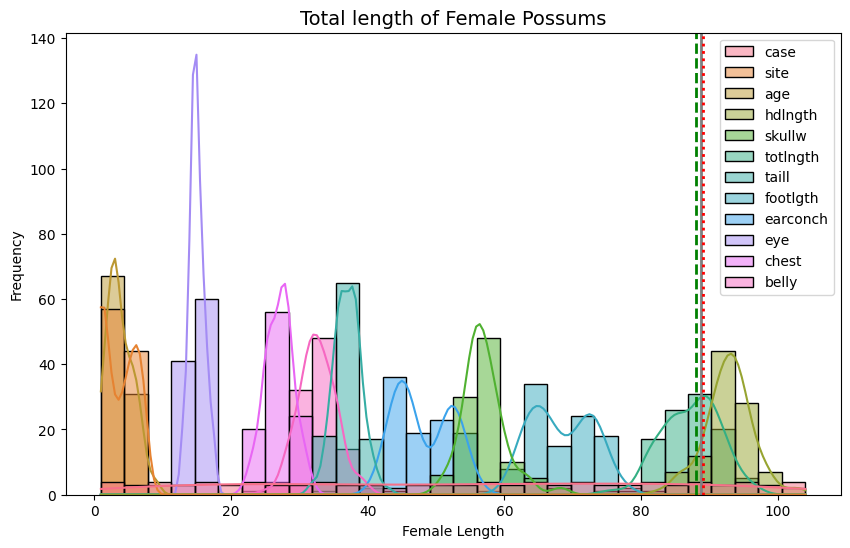

In [816]:
# plotting the chart for the total length of female possums
# Plot histogram with KDE 
plt.figure(figsize=(10,6))
sns.histplot(possums, bins=30, kde=True, color="purple")
# Add vertical lines
plt.axvline(female_features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {female_features_mean}')
plt.axvline(female_features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {female_features_median}')
plt.axvline(female_features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {female_features_mode}')
# Add title and skewness
plt.title(f"Total length of Female Possums", fontsize=14)
plt.xlabel("Female Length")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

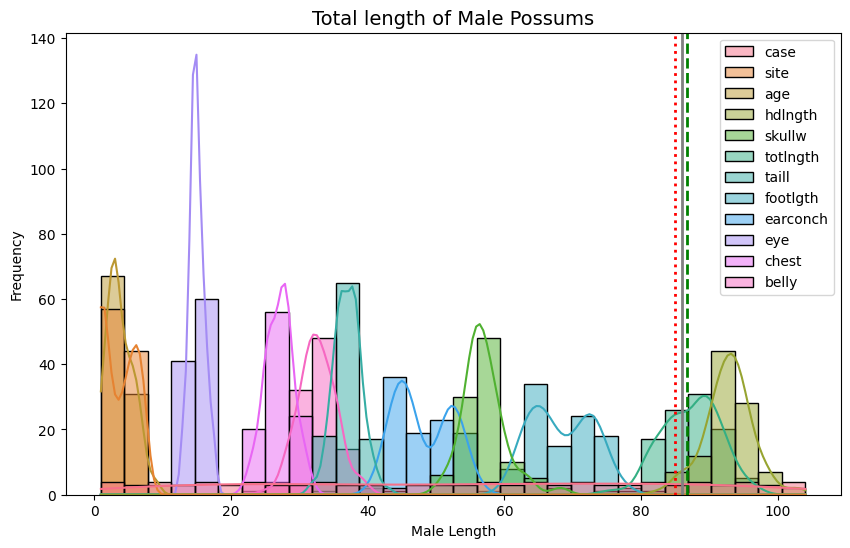

In [817]:
# plotting the chart for the total length of male possums
# Plot histogram with KDE 
plt.figure(figsize=(10,6))
sns.histplot(possums, bins=30, kde=True, color="purple")
# Add vertical lines
plt.axvline(male_features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {male_features_mean}')
plt.axvline(male_features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {male_features_median}')
plt.axvline(male_features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {male_features_mode}')
# Add title and skewness
plt.title(f"Total length of Male Possums", fontsize=14)
plt.xlabel("Male Length")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

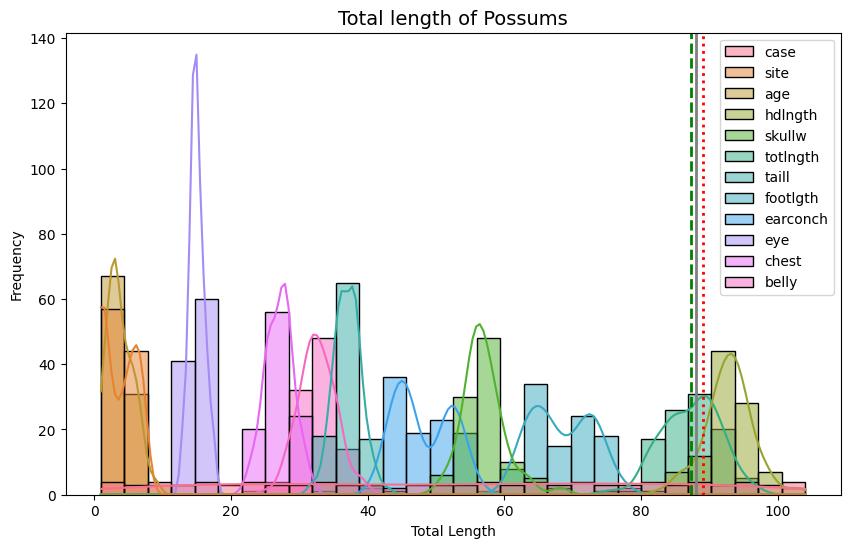

In [818]:
# Plot histogram with KDE
# plotting the chart for the total length of possums
plt.figure(figsize=(10,6))
sns.histplot(possums, bins=30, kde=True, color="purple")
# Add vertical lines
plt.axvline(features_mean['totlngth'], color='green', linestyle='--', linewidth=2, label=f'Mean = {features_mean}')
plt.axvline(features_median['totlngth'], color='grey', linestyle='-', linewidth=2, label=f'Median = {features_median}')
plt.axvline(features_mode['totlngth'], color='red', linestyle=':', linewidth=2, label=f'Mode = {features_mode}')
# Add title and skewness
plt.title(f"Total length of Possums", fontsize=14)
plt.xlabel("Total Length")
plt.ylabel("Frequency")

### **Measure of Spread**

In [819]:
# calculating the minimum age for all the possums irrespective of gender
min_age = possums["age"].min()
min_age

# calculating the maximum age for all the possums irrespective of gender
max_age = possums["age"].max()
max_age



np.float64(9.0)

In [820]:
# calculating the minimum age for all the female possums
female_min_age = female["age"].min()
female_min_age


# calculating the maximum age for all the female possums
female_max_age = female["age"].max()
female_max_age



np.float64(9.0)

In [821]:
# calculating the minimum age for all the male possums
male_min_age = male["age"].min()
male_min_age

# calculating the maximum age for all the male possums
male_max_age = male["age"].max()
male_max_age

np.float64(8.0)

In [822]:
# calculating the age range for all possums 
age_range = max_age - min_age
age_range
print("The age range for all the possums irrespective of gender is ", age_range)

The age range for all the possums irrespective of gender is  8.0


In [823]:
# calculating the age range for all female possums 
female_age_range = female_max_age - female_min_age
female_age_range
print("The age range for all the female possums is: ", female_age_range)

The age range for all the female possums is:  8.0


In [824]:
# calculating the age range for all male possums 
male_age_range = male_max_age - male_min_age
male_age_range
print("The age range for all the male possums is: ", male_age_range)

The age range for all the male possums is:  7.0


**Insights Using the Range of the possum ages**

**Insights Using the Range for the Total Length of the Possums**

In [825]:
# calculating the minimum length range for all female possums
min_total_length_female = female["totlngth"].min()
min_total_length_female
print("The minimum total length for all female possums is ", min_total_length_female)

The minimum total length for all female possums is  75.0


In [826]:
# calculating the maximum length range for all female possums
max_total_length_female = female["totlngth"].max()
max_total_length_female
print("The maximum total length for all female possums is ", max_total_length_female)

The maximum total length for all female possums is  96.5


In [827]:
# calculating the total length range for all female possums
total_length_female_range = max_total_length_female - min_total_length_female
total_length_female_range

print("The total length range for all male possums  is ", total_length_female_range)

The total length range for all male possums  is  21.5


In [828]:
# calculating the minimum length range for all male possums
min_total_length_male = male["totlngth"].min()
min_total_length_male

print("The minimum total length for all male possums is ", min_total_length_male)



The minimum total length for all male possums is  77.0


In [829]:
# calculating the maximum length range for all male possums
max_total_length_male = male["totlngth"].max()
max_total_length_male
print("The maximum total length for all male possums is: ", max_total_length_male)

The maximum total length for all male possums is:  96.0


In [830]:
# calculating the total length range for all male possums
total_length_male_range = max_total_length_male - min_total_length_male
total_length_male_range

print("The total length range for all male possums  is: ", total_length_male_range)

The total length range for all male possums  is:  19.0


In [831]:
# calculating the minimum length range for all possums
min_total_length = possums["totlngth"].min()
min_total_length
print("The minimmum total length for all the possums irrespective of gender is: ", min_total_length)

The minimmum total length for all the possums irrespective of gender is:  75.0


In [832]:
# calculating the maximum total length range for all possums
max_total_length = possums["totlngth"].max()
max_total_length
print("The maximum total length for all the possums irrespective of gender is: ", max_total_length)


The maximum total length for all the possums irrespective of gender is:  96.5


In [833]:
# calculating the total length range for all possums
total_length_range = max_total_length - min_total_length
total_length_range
print("The total length range for all the possums is: ", total_length_range)

The total length range for all the possums is:  21.5


In [834]:
# checking the statistical summary of all the data
possums.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [835]:
# calculating the variance of each features of a possum
features_variance = possums.var(axis=0, numeric_only= True) 
print(f"The Variance of the features of all male and female possums:\n{features_variance}")

The Variance of the features of all male and female possums:
case        934.762970
site          5.602178
age           3.667921
hdlngth      12.381349
skullw        9.626616
totlngth     17.613149
taill         3.887525
footlgth     19.478996
earconch     16.486455
eye           1.120725
chest         4.083317
belly         7.440594
dtype: float64


In [836]:
# calculating the standard deviation of each features of a possum
features_std = possums.std(axis=0, numeric_only= True)

print(f"The Variance of the features of all male and female possums:\n{features_std}")


The Variance of the features of all male and female possums:
case        30.573894
site         2.366892
age          1.915182
hdlngth      3.518714
skullw       3.102679
totlngth     4.196802
taill        1.971681
footlgth     4.413502
earconch     4.060352
eye          1.058643
chest        2.020722
belly        2.727745
dtype: float64


In [849]:
# Relative spread (Coefficient of Variation)

cv = features_std["totlngth"] / features_mean["totlngth"]  # ratio
cv_percent = cv * 100             # percentage

print("Coefficient of Variation (CV):", cv)
print("Relative Spread (% of mean):", round(cv_percent), "%")

Coefficient of Variation (CV): 0.04809024300569761
Relative Spread (% of mean): 5 %


In [837]:
# finding percentiles of the total length of the possums
percentiles = possums["totlngth"].quantile([0.25, 0.50, 0.75])
print("Percentiles:\n", percentiles)

Percentiles:
 0.25    84.5
0.50    88.0
0.75    90.0
Name: totlngth, dtype: float64


In [838]:
# calculating the interquartle range using total length of the possums
iqr = percentiles[0.75] - percentiles[0.25]
print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 5.5


In [839]:
# finding the skewness of the total length of the possums
skewness = possums["totlngth"].skew()
print("The Skewness of the Total Length of the Possums is:\n", skewness, "\nIt is negatively skewed indicating that there are lower values as outliers.")

The Skewness of the Total Length of the Possums is:
 -0.2488556532210192 
It is negatively skewed indicating that there are lower values as outliers.


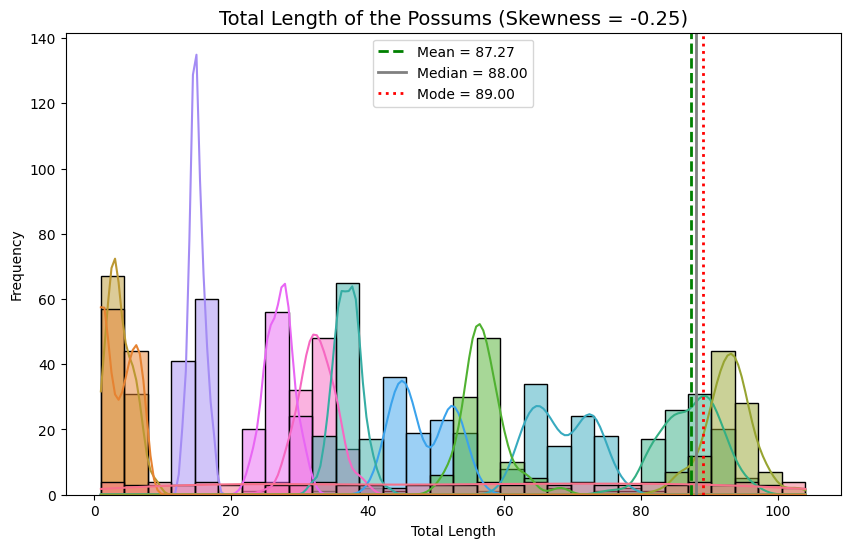

In [840]:
# plotting te total length historgram of the possums with KDE
features_mean["totlngth"]
features_median["totlngth"]
features_mode["totlngth"]
skewness

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(possums, bins=30, kde=True, color="purple")

# Add vertical lines
plt.axvline(features_mean["totlngth"], color='green', linestyle='--', linewidth=2, label=f'Mean = {features_mean["totlngth"]:.2f}')
plt.axvline(features_median["totlngth"], color='grey', linestyle='-', linewidth=2, label=f'Median = {features_median["totlngth"]:.2f}')
plt.axvline(features_mode["totlngth"], color='red', linestyle=':', linewidth=2, label=f'Mode = {features_mode["totlngth"]:.2f}')

# Add title and skewness
plt.title(f"Total Length of the Possums (Skewness = {skewness:.2f})", fontsize=14)
plt.xlabel("Total Length")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [841]:
# calculating the kurtosis of the total length of the pussoms
kurtosis = possums["totlngth"].kurtosis()

print("The Kurtosis of the Total Length of the Possums is:\n", kurtosis)

The Kurtosis of the Total Length of the Possums is:
 -0.1619606976561152


In [845]:
# Detecting Outliers for the total length of the possums

# calculating outlier threshold
q3 = percentiles[0.75] 
q1 = percentiles[0.25] 
q2 = percentiles[0.50]

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: ", lower_bound)
print(f"Upper Bound: ", upper_bound)

Lower Bound:  76.25
Upper Bound:  98.25


In [846]:
# detecting outliers
total_length = possums["totlngth"].values

outliers = total_length[(total_length < lower_bound) | (total_length > upper_bound)]
print(f"List of outliers, {outliers}")

List of outliers, [75.]


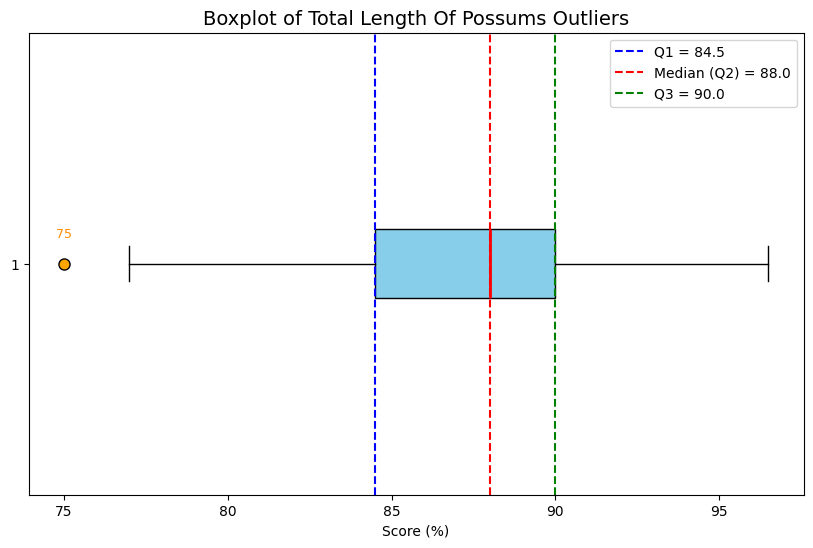

Q1 (25th percentile): 84.50
Q2 (Median, 50th percentile): 88.00
Q3 (75th percentile): 90.00
IQR (Q3 - Q1): 5.50
Lower Bound for Outliers: 76.25
Upper Bound for Outliers: 98.25
Outliers Detected: [np.float64(75.0)]


In [847]:

plt.figure(figsize=(10, 6))
box = plt.boxplot(total_length, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quartiles
plt.axvline(q1, color="blue", linestyle="--", label=f"Q1 = {q1:.1f}")
plt.axvline(q2, color="red", linestyle="--", label=f"Median (Q2) = {q2:.1f}")
plt.axvline(q3, color="green", linestyle="--", label=f"Q3 = {q3:.1f}")

# Annotate outliers if present
for outlier in outliers:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of Total Length Of Possums Outliers", fontsize=14)
plt.xlabel("Score (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q2 (Median, 50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR (Q3 - Q1): {iqr:.2f}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")
print(f"Outliers Detected: {list(outliers)}")